In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open("./bert-base-uncased-finetuned-Roman_Urdu/checkpoint-42500/trainer_state.json", "rb") as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data['log_history'])
temp = df.iloc[:,[0,2,3,4]].copy()

temp.iloc[0,3] = (float(temp.iloc[1,1]) - float(temp.iloc[2,3])) + float(temp.iloc[2,3])

In [4]:
cleaned_data = pd.DataFrame()
cleaned_data['epochs'] = temp.iloc[::2,0].copy().reset_index(drop=True)
cleaned_data['steps'] = temp.iloc[::2,2].copy().reset_index(drop=True)

cleaned_data['eval_loss'] = temp.iloc[::2,3].copy().reset_index(drop=True)
cleaned_data['train_loss'] = temp.iloc[0,1]

j = 1
for i in range(1,len(temp),2):
    cleaned_data.iloc[j,3] = temp.iloc[i,1]
    j +=1

In [5]:
# Final iteration
cleaned_data = cleaned_data.append(
    {'epochs':3.0,
     'steps': 42858,
     'eval_loss': 2.898037 ,
     'train_loss': 2.974900
    },ignore_index=True)



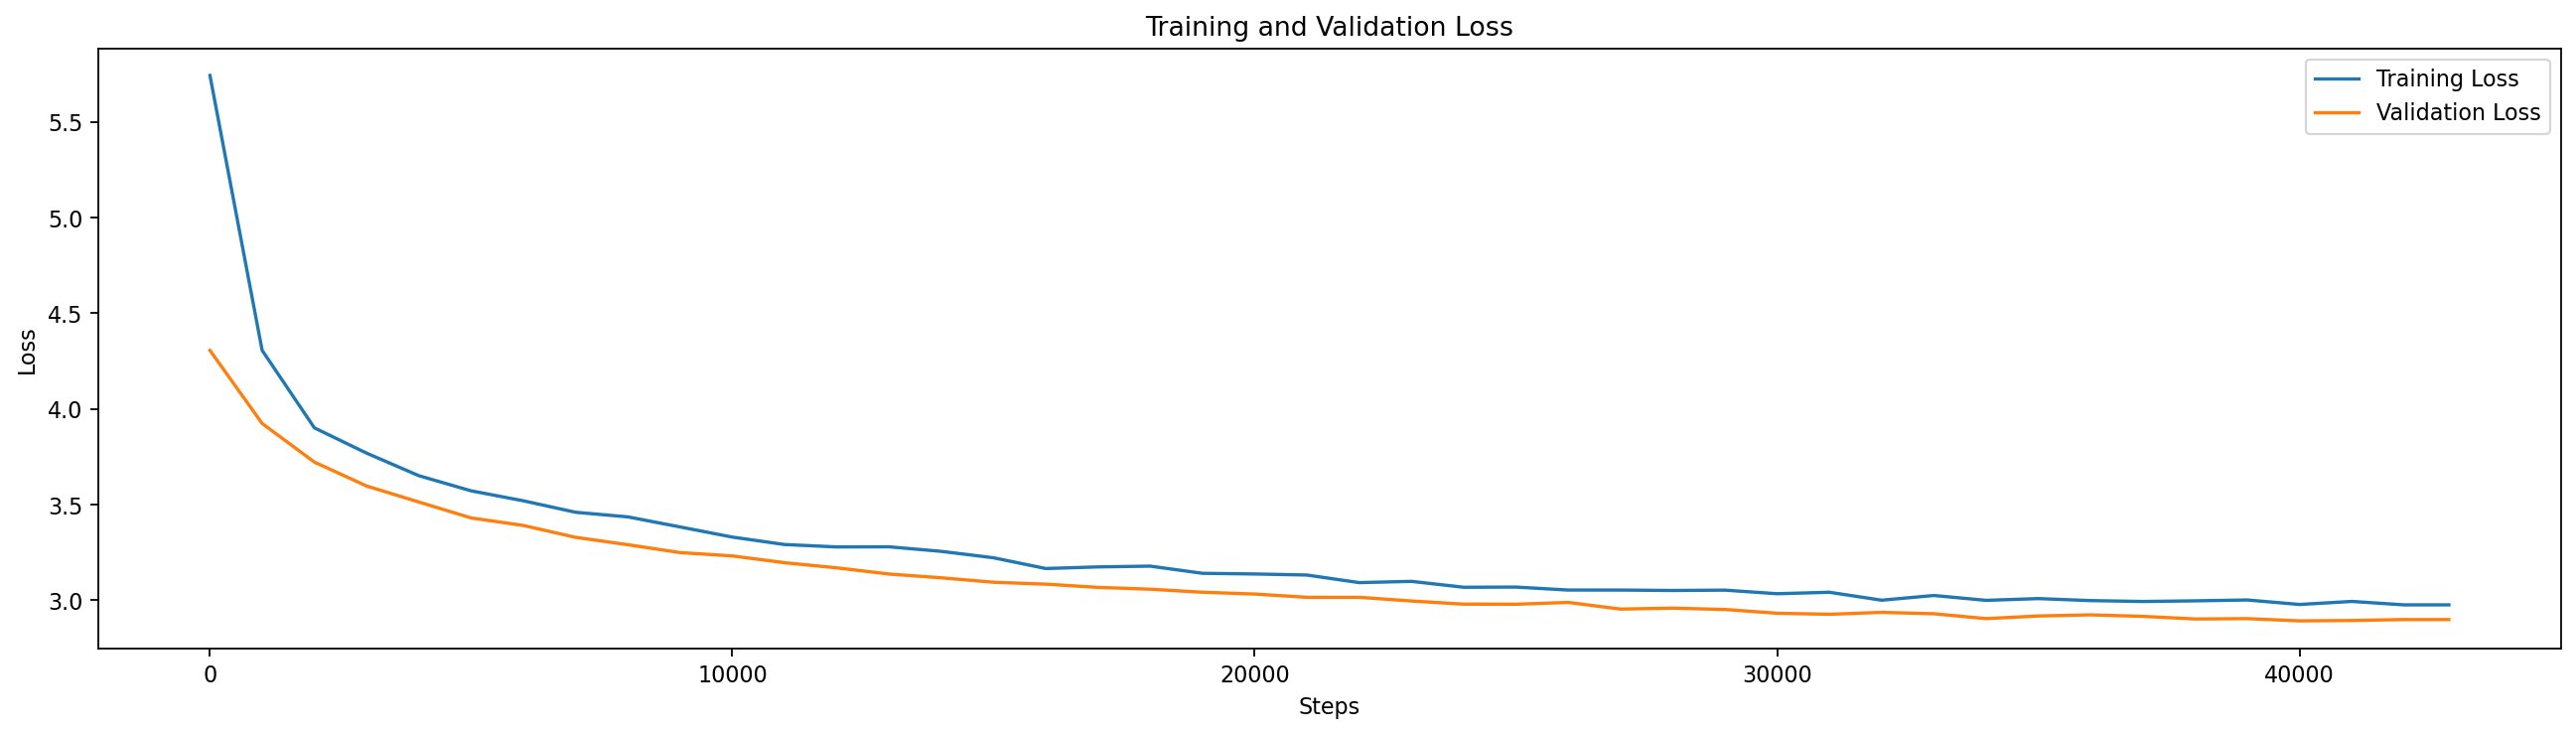

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(20, 5), dpi=160)

  
# Y data
train_loss_line = cleaned_data.iloc[:,3].copy().reset_index(drop=True)
validation_loss_line = cleaned_data.iloc[:,2].copy().reset_index(drop=True)

# X data
x  = cleaned_data.iloc[:,1].copy().reset_index(drop=True)

# plot lines
plt.plot(x,train_loss_line, label = "Training Loss")
plt.plot(x,validation_loss_line, label = "Validation Loss")



plt.xlabel("Steps")
plt.ylabel('Loss')


plt.title('Training and Validation Loss')


plt.legend()
plt.show()

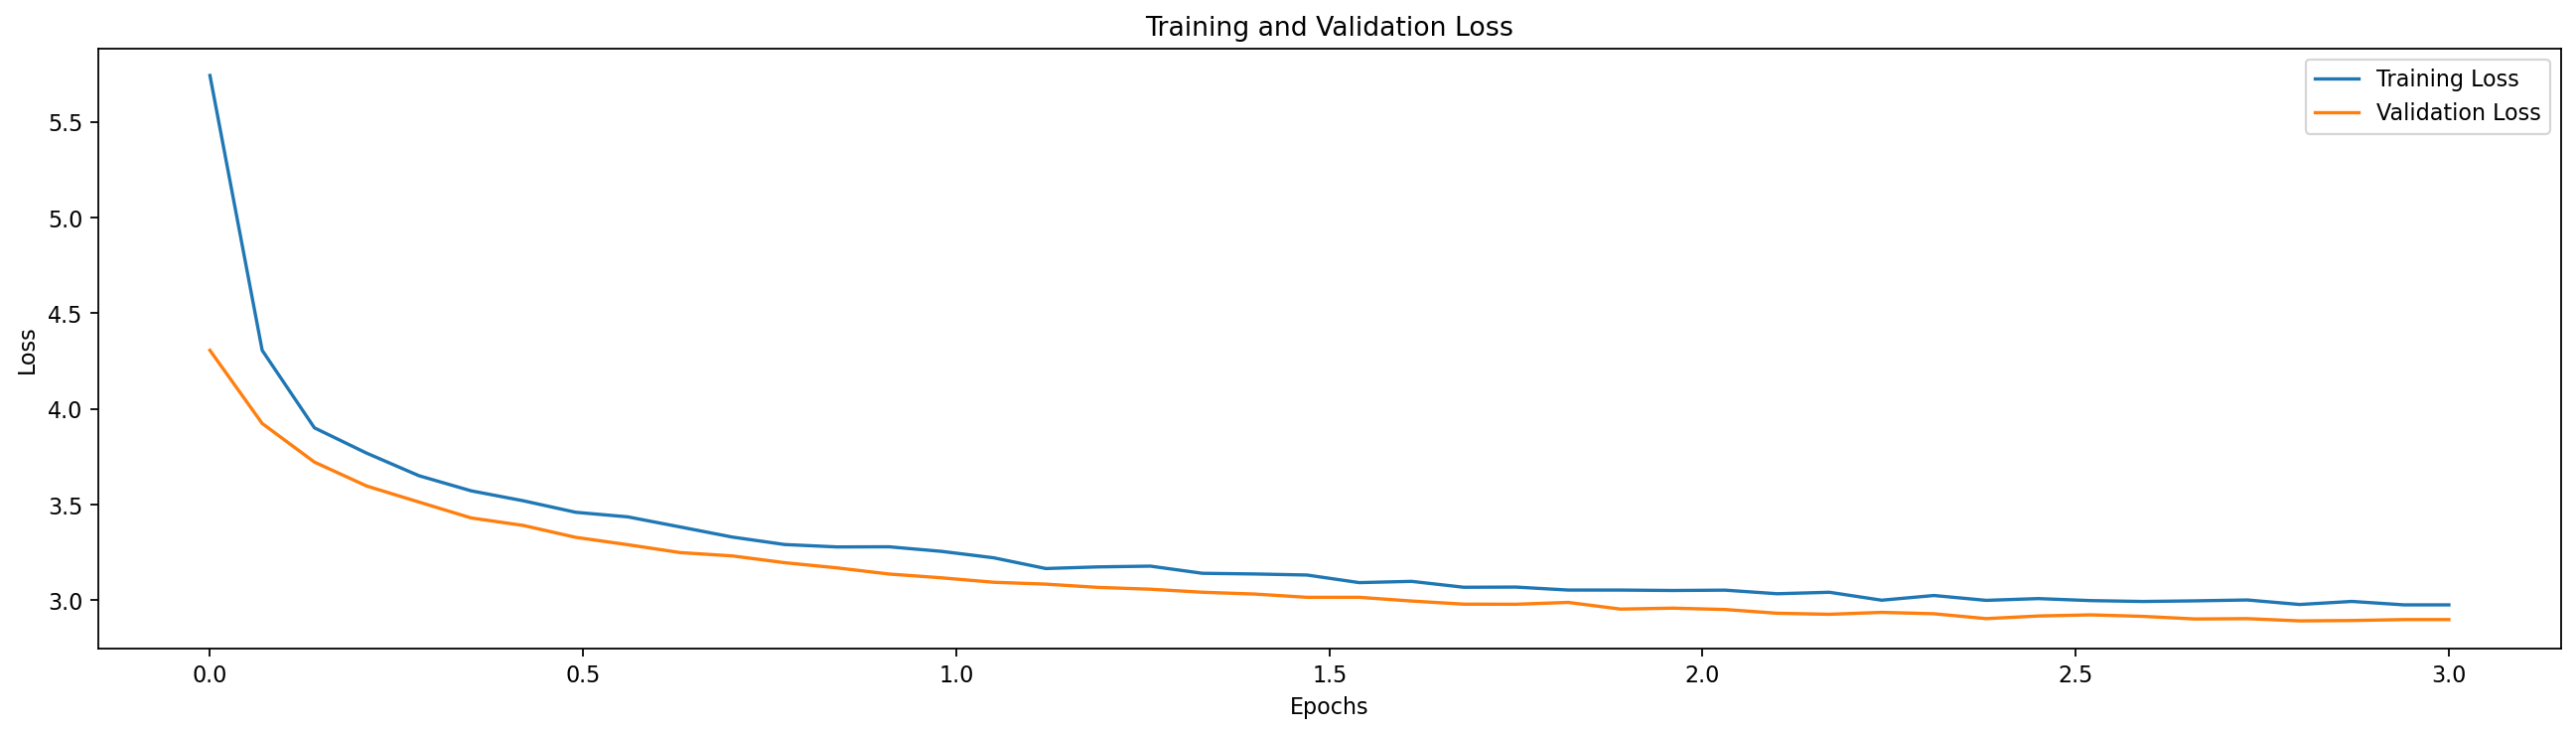

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(20, 10), dpi=160)

  
# Y data
train_loss_line = cleaned_data.iloc[:,3].copy().reset_index(drop=True)
validation_loss_line = cleaned_data.iloc[:,2].copy().reset_index(drop=True)

# X data
x  = cleaned_data.iloc[:,0].copy().reset_index(drop=True)

# plot lines
plt.plot(x,train_loss_line, label = "Training Loss")
plt.plot(x,validation_loss_line, label = "Validation Loss")



plt.xlabel("Epochs")
#plt.xticks(np.arange(cleaned_data.iloc[:,1].min(), cleaned_data.iloc[:,1].max(),1000))

plt.ylabel('Loss')


plt.title('Training and Validation Loss')


plt.legend()
plt.show()